In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
from collections import defaultdict


def extract_data(name, first_rows = 1):
    df = pd.read_csv(name)
    for i in range(first_rows):
        df = df.drop(i, axis=0)
    #display(df)

    df_lists = defaultdict(lambda : pd.DataFrame())

    for column_name in df:
        if column_name[0] == 'U':
            continue
        column = df[column_name]
        num, rank = map(int, column_name.split('_'))
        #print(num, rank)
        num = int(np.sqrt(num))
        df_lists[num][rank] = column
        
    return df_lists
    

In [39]:
precision_dictionaries = extract_data("experiments_results/experiment3/presicion.csv", first_rows=0)

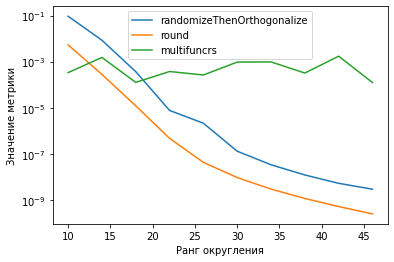

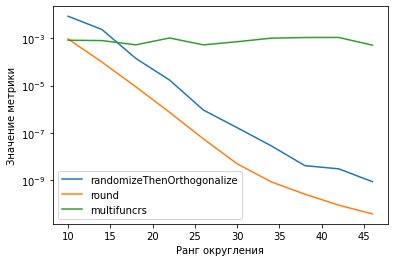

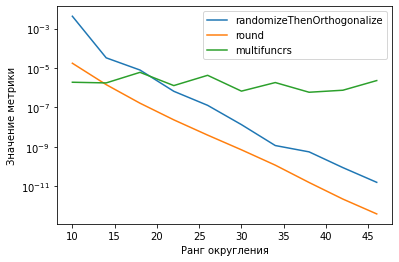

In [48]:
names = ["randomizeThenOrthogonalize", "round", "multifuncrs"]

for max_rank, df in precision_dictionaries.items():
    ax = plt.subplot()
    for i in range(3):
        ax.plot(df.loc[i, :], label = names[i])
        ax.set_yscale('log')
        ax.set_xlabel("Ранг округления")
        ax.set_ylabel("Значение метрики")
        ax.legend()
    plt.show()

In [50]:
time_dictionaries = extract_data("experiments_results/experiment3/time.csv", first_rows=0)

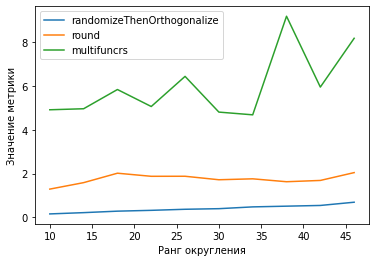

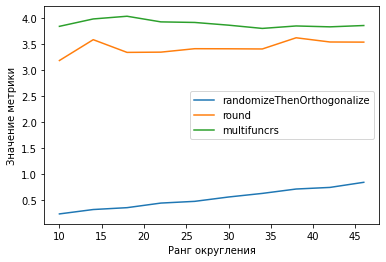

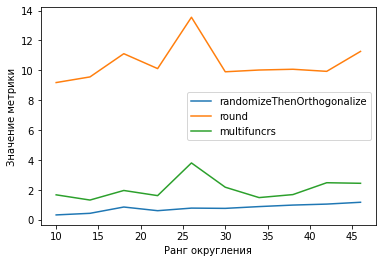

In [52]:
names = ["randomizeThenOrthogonalize", "round", "multifuncrs"]

for max_rank, df in time_dictionaries.items():
    ax = plt.subplot()
    for i in range(3):
        ax.plot(df.loc[i, :], label = names[i])
        ax.set_xlabel("Ранг округления")
        ax.set_ylabel("Значение метрики")
        ax.legend()
    plt.show()